# Employment, gender, and the impact of COVID-19
## by Rob Urquhart

## Investigation Overview

> In this investigation I will explore gender, work, earnings, and how COVID-19 has impacted men and women.

## Dataset Overview

><br> For this exercise, I examined the NIDS-CRAM dataset. NIDS-CRAM is the National Income Dynamics Study - Coronavirus Rapid Mobile Survey. The survey investigates the socioeconomic impacts of the national lockdown associated with the State of Disaster declared in South Africa in March 2020. From March 23 through to early May 2020, South Africa was placed under an economic and social lockdown. The core NIDS-CRAM dataset contains responses to 140 questions. The data set under examination here considers the responses from 7,073 interviews for 56 of the 140 questions.

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('CRAMS_2.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [16]:
# setting up a data frame called df_clear to look at changed status in employment between February and April
# cleaning na's from work_feb and work_apr

df_clear = df.loc[((df['work_feb'].notna()) & (df['work_apr'].notna()))]

# Setting up a new column called status that records whether those working in Feb, are now working in April

def change(x):
    emp_feb = x['work_feb']
    emp_apr = x['work_apr']
    
    if emp_feb == 'yes' and emp_apr=='yes':
        return 'employed'
    elif emp_feb =='yes' and emp_apr=='no':
        return 'unemployed'
    else:
        return 'ex'

df_clear['status']=df_clear.apply(change, axis=1)
df_clear

# dropping 'ex' which would be those employed in Feb and in April
df_clear = df_clear[df_clear.status != 'ex']

## Composition of the survey results by gender of respondents

> Nearly two thirds of respondents to the NIDS-CRAM survey are women.

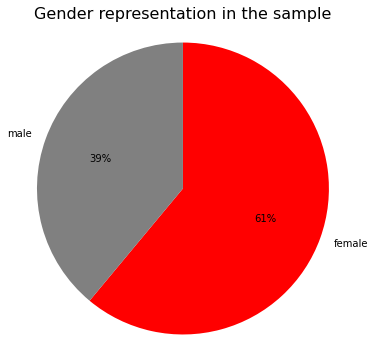

In [17]:
sorted_counts = df['gender'].value_counts()
plt.figure(figsize=(9,6))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, colors=['red','grey'], autopct='%.0f%%')
plt.title('Gender representation in the sample', fontsize=16)
plt.axis('square');

## Gender representation in occupations
> Women are more highly represented in three occupational categories particularly exposed to job shrinkage as a result of COVID-19.  Women are highly represented in elementary work (typically unskilled or low-skilled work), services and sales, professionals, and clerical support. 

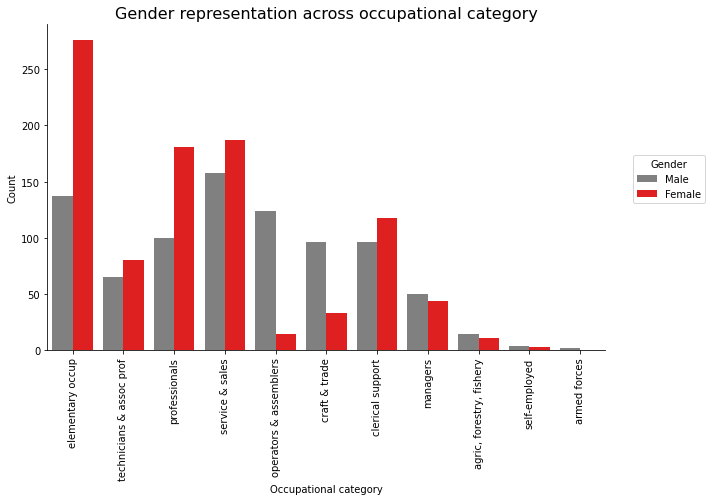

In [18]:
# Looking at gender representation against work_code (occupational category)

# Ignoring the unemployed category
df_og=df_clear[df_clear.work_code != 'unemployed']

#Setting the plot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sb.countplot(data=df_og, x='work_code', hue='gender', palette=['#808080','#ff0000'])
plt.xticks(rotation=90);
sb.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False);

# Title, labels, legends
plt.legend(title='Gender', labels=['Male', 'Female'],bbox_to_anchor=(1.05, .6), loc=2, borderaxespad=0. )
ax.set(xlabel="Occupational category", ylabel='Count')
plt.title('Gender representation across occupational category', fontsize=16);

## Distribution of monthly income

> The majority of survey respondents are low income earners. Monthly earnings skew right and have a long tail - the majority of respondents reporting on their monthly income in both February and April earn less than R10,000 per month. We can also see lower counts of monthly income in April; suggesting that there was higher unemployment and no income earned during lockdown.

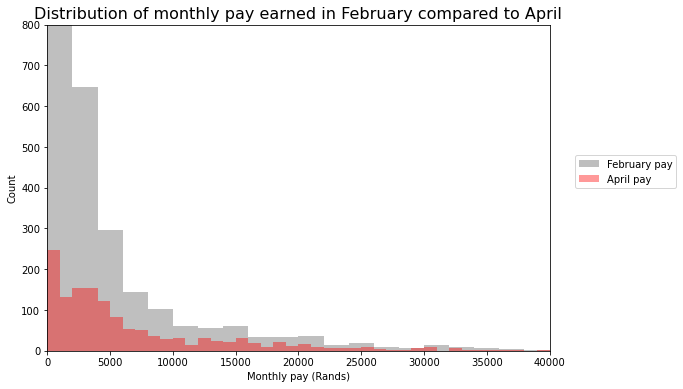

In [19]:
plt.figure(figsize=(9,6))
plt.hist(data=df, x='feb_pay_pure', bins=100, alpha=0.5, label="february pay", color='grey')
plt.hist(data=df, x='apr_pay_pure', bins=100, alpha=0.4, label="april pay", color = 'red');
plt.xlim(0,40000)
plt.ylim(0,800)
plt.xlabel('Monthly pay (Rands)')
plt.ylabel('Count')
plt.legend(title='', labels=['February pay', 'April pay'],bbox_to_anchor=(1.05, .6), loc=2, borderaxespad=0.)
plt.title('Distribution of monthly pay earned in February compared to April', fontsize=16);

## Change in employment
> Lockdown significantly impacted employment. Nearly 50% of those who reported that they were employed in February, reported that they were unemployed in April.

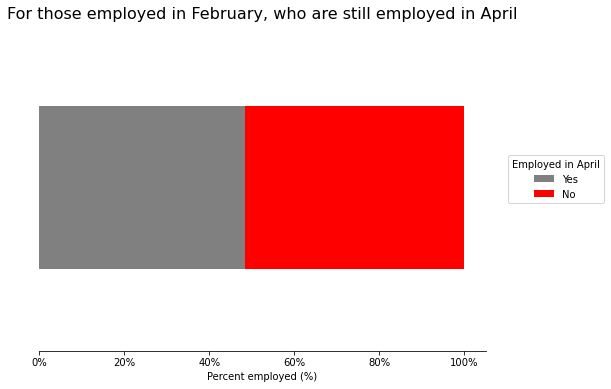

In [20]:
from matplotlib.ticker import FuncFormatter

# Groupby status
df_clear1 = df_clear.groupby(['status']).agg(status_size=('status', 'size')).reset_index()

# Converting df_clear 1 to percentages
df_clear1['percent']=(df_clear1['status_size']/df_clear1['status_size'].sum())
df_clear1

# And then plotting percent rather than count as a stacked bar, and tidying up

g=stack1=df_clear1.percent.to_frame().T.plot.barh(stacked=True, color={0:'grey', 1:'red'}, legend=False, figsize=(8,6))
ax.legend_out=True
sb.despine(fig=None, ax=g, top=True, right=True, left=True, bottom=False, offset=None, trim=False);

# getting rid of  y ticks
g.set(yticks=[])

# adding a title
plt.title('For those employed in February, who are still employed in April', fontsize=16)

# changing the legend location
plt.legend(title='Employed in April', labels=['Yes', 'No'],bbox_to_anchor=(1.05, .6), loc=2, borderaxespad=0. );

# format x axis
g.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
g.set(xlabel="Percent employed (%)");

## The impact of lockdown on men and women's employment
> Women were more vulnerable to employment as a result of lockdown. 57.57% of women employed in February reported being unemployed in April, compared ot 44.36% of men; a 13% difference.

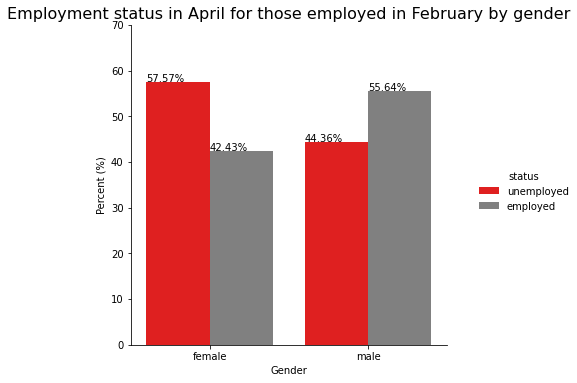

In [21]:
# Tidying the plot up
df_wg=df_clear[df_clear.work_feb != 'retired']


# Adding data labels
x,y = 'gender', 'status'

df1 = df_wg.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sb.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette=['#ff0000','#808080']);
ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.ylim (0,70)
plt.title('Employment status in April for those employed in February by gender', fontsize=16)
g.set(xlabel='Gender', ylabel='Percent (%)');

## The impact of lockdown on monthly earnings for those who continue to be employed
> On average women earn less than men. Surprisingly for both men and women who were employed in April, average pay appears to have increased. (Reasons for this could include overtime, essential services work, or the application of annual pay increases in the interim month of March.) Even so, the income disparity for women persists.

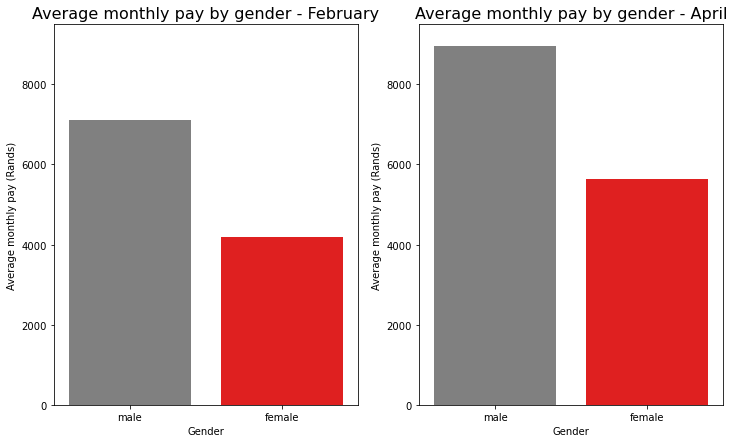

In [22]:
# Setting both bar charts next to each other
gend_pay = df.groupby(['gender']).agg(feb_pay_pure_mean=('feb_pay_pure', 'mean')).reset_index()
gend_pay2 = df.groupby(['gender']).agg(apr_pay_pure_mean=('apr_pay_pure', 'mean')).reset_index()

plt.figure(figsize = [12, 7])

# Plot of mean earnings by gender in February
plt.subplot(1, 2, 1)
ax1=sb.barplot(x = 'gender', y = 'feb_pay_pure_mean', data = gend_pay, order = ['male', 'female'], palette=['#808080','#ff0000'])
plt.title('Average monthly pay by gender - February', fontsize=16)
ax1.set(ylabel='Average monthly pay (Rands)',xlabel='Gender')
plt.ylim(0,9500);

# Plot of mean earnings by gender in April
plt.subplot(1, 2, 2)
ax=sb.barplot(x = 'gender', y = 'apr_pay_pure_mean', data = gend_pay2, order = ['male', 'female'],palette=['#808080','#ff0000'])
plt.title('Average monthly pay by gender - April', fontsize=16)
ax.set(ylabel='Average monthly pay (Rands)',xlabel='Gender')
plt.ylim(0,9500);

## Earnings by gender across occupational categories
> Across nearly all occupations (except the self-employed), women earn less than men. It is interesting to note that in elementary and sales and service occupations where women are well represented, their median wage is nearly the same as the wages for men at the 25th percentile.

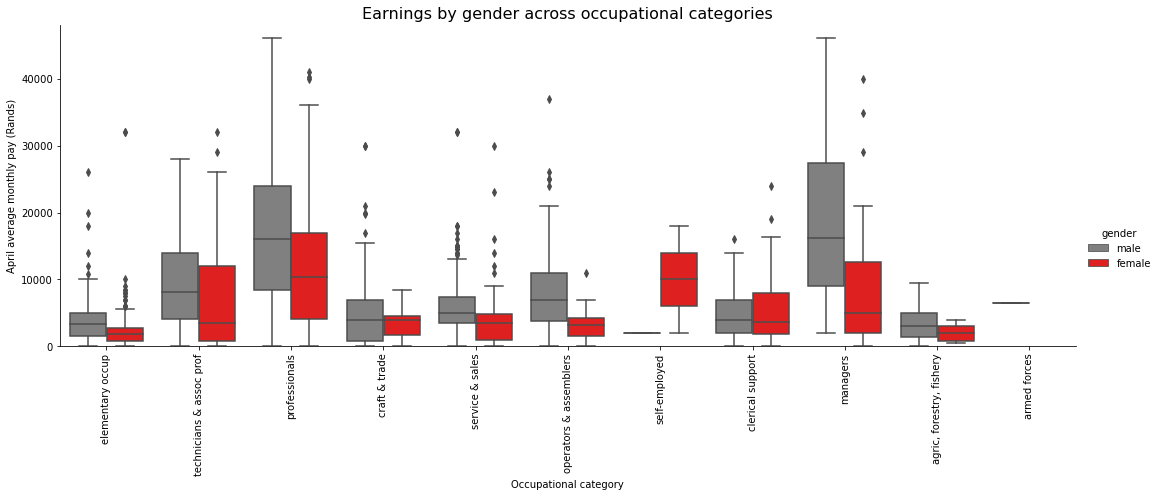

In [23]:
#Experimenting as a boxplot
df_gpo=df[df.work_code != 'unemployed']

g = sb.catplot(x="work_code", y="apr_pay_pure", hue="gender", 
               data=df_gpo, dodge=True, height=5, aspect=3, kind='box', palette=['#808080','#ff0000'])
plt.ylim(0,48000);
plt.xticks(rotation=90)
plt.title('Earnings by gender across occupational categories', fontsize=16)
g.set(xlabel="Occupational category", ylabel='April average monthly pay (Rands)');

## Increase in childcare
> Women report a higher burden of childcare during lockdown compared to men.

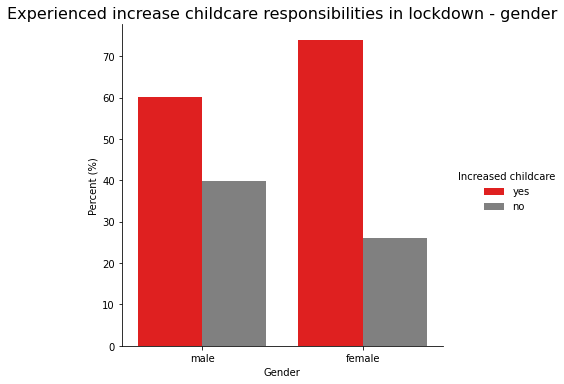

In [24]:
# Turning this into percentages
x,y = 'gender', 'chldcr'

g=(df.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette=['#ff0000','#808080'], order=['male','female']))
plt.title('Experienced increase childcare responsibilities in lockdown - gender', fontsize=16)
new_title = 'Increased childcare'
g._legend.set_title(new_title)
g.set(xlabel="Gender", ylabel='Percent (%)');

## Time spent on increased childcare
> A higher proportion of women than men reported spending 4 hours or more on childcare during lockdown.

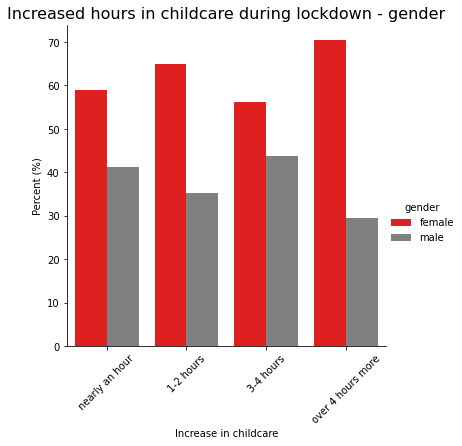

In [25]:
x,y = 'time_chldcr', 'gender'

g=(df.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar', palette=['#ff0000','#808080'], 
      order=['nearly an hour','1-2 hours','3-4 hours','over 4 hours more']))
plt.title('Increased hours in childcare during lockdown - gender', fontsize=16)
g.set(xlabel="Increase in childcare", ylabel='Percent (%)')
plt.xticks(rotation=45);

## Summary
> 1. Women make up a large proportion of the data under investigation.
> 2. The majority of the data set report low monthly earnings, which would make them particularly vulnerable to unemployment. 
> 3. Women are particuarly represented in industries impacted by COVID-19 such as elementary (low or semi-skilled) jobs and sales and service work.
> 4. And nearly across the board they earn less than men in those industries.
> 5. Women more than men reported that their childcare responsibilities increased during lockdown, and more women than men reported that they spent four hore or more on this added responsibility.
> 6. Nearly half of those in the data set who reported that they were employed in February reported being unemployed in April.
> 7. Women were more heavly impacted by unemployment in this time; by over 13% more than men.

In [26]:
!jupyter nbconvert "NIDS_CRAM_pres2.ipynb" --to slides --template output_toggle

[NbConvertApp] Converting notebook NIDS_CRAM_pres2.ipynb to slides
[NbConvertApp] Writing 538025 bytes to NIDS_CRAM_pres2.slides.html
